In [1]:
import sys
if not '/home/pop518504/git/gknet-benchmarks' in sys.path:
    sys.path.insert(0, '/home/pop518504/git/gknet-benchmarks')
from utils import *
import seaborn as sns
sns.set_style("darkgrid")
    
_, calculators = load_calculators_from_pickle("/home/pop518504/git/gknet-benchmarks/benchmarks/oom_analysis/oom_analysis.pickle")
super_cells = load_super_cells_from_pickle("/home/pop518504/git/gknet-benchmarks/make_supercells/supercells_108_23328.pickle")
system_sizes = sorted([len(sc) for sc in super_cells])

max_n = max([c.n for c in calculators])
idx_max_n = system_sizes.index(max_n)
system_sizes = system_sizes[:idx_max_n + 1]

for c in calculators:
    print("{:<70} went OOM at n={}".format(c.description, c.n))    
    
print([len(sc) for sc in super_cells])

GNN Neighbor List (stress=True, stresses=True, jit=True)               went OOM at n=3600
GNN Neighbor List (stress=False, stresses=True, jit=True)              went OOM at n=3600
GNN Neighbor List (stress=True, stresses=False, jit=True)              went OOM at n=4000
GNN Neighbor List (stress=False, stresses=False, jit=False)            went OOM at n=4000
JAX-MD Pair (stress=True, stresses=True, jit=True)                     went OOM at n=6336
JAX-MD Pair (stress=False, stresses=True, jit=True)                    went OOM at n=6336
JAX-MD Pair (stress=False, stresses=False, jit=False)                  went OOM at n=6336
GNN Neighbor List (stress=False, stresses=False, jit=True)             went OOM at n=6336
JAX-MD Pair (stress=True, stresses=False, jit=True)                    went OOM at n=13500
JAX-MD Pair (stress=False, stresses=False, jit=True)                   went OOM at n=15360
JAX-MD Neighbor List (stress=True, stresses=True, jit=True)            went OOM at n=15360
JAX-MD 

In [2]:
# TODO: Fix short descriptions to include "Lennard-Jones" (distinguish from GNN)
# GNN: Include Neighbor List?
# remove duplicates but keep correct ordering of appearance
labels = [c.short_description for c in calculators]
labels = sorted(set(labels), key=labels.index)

print(labels)
labels[0] = "JAX-MD " + labels[0]
labels[1] = "JAX-MD LJ Pair"
labels[2] = "JAX-MD LJ Neighbor List"
print(labels)

all_properties = list(map(lambda c: c.n, filter(lambda c: c._stress and c._stresses, calculators)))
only_stress = list(map(lambda c: c.n, filter(lambda c: c._stress and not c._stresses, calculators)))
only_stresses = list(map(lambda c: c.n, filter(lambda c: not c._stress and c._stresses, calculators)))
only_energies_and_forces = list(map(lambda c: c.n, filter(lambda c: not c._stress and not c._stresses and c._jit, calculators)))
only_energies_and_forces_no_jit = list(map(lambda c: c.n, filter(lambda c: not c._stress and not c._stresses and not c._jit, calculators)))

['GNN Neighbor List', 'JAX-MD Pair', 'JAX-MD Neighbor List']
['JAX-MD GNN Neighbor List', 'JAX-MD LJ Pair', 'JAX-MD LJ Neighbor List']


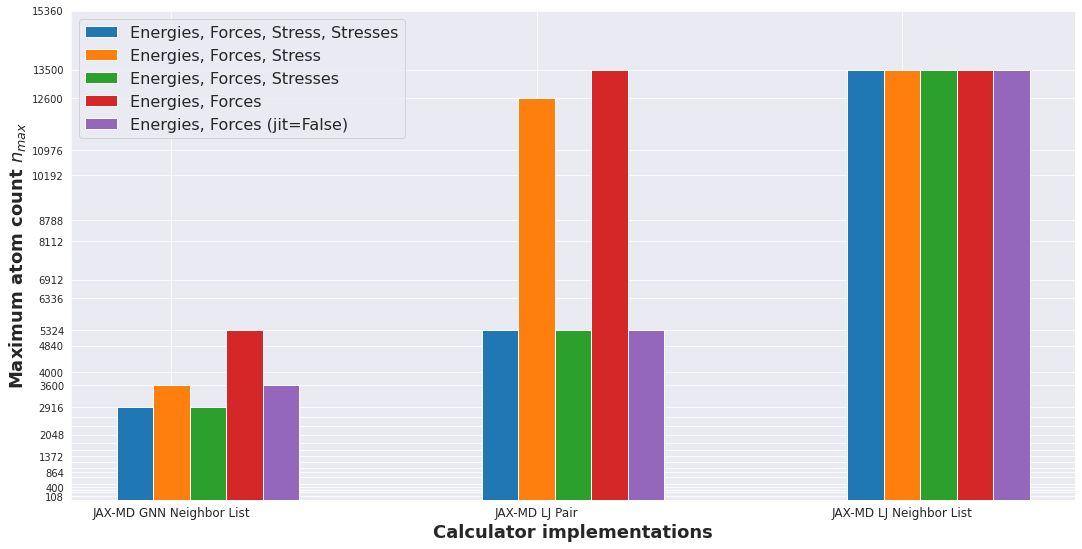

In [3]:
plot_oom_behavior(labels, system_sizes, all_properties, only_stress, only_stresses, only_energies_and_forces, only_energies_and_forces_no_jit, figsize=(18, 9))